# Definition
The signal to noise ratio SNR is defined as:

$$SNR = \frac{\text{Received Signal Power}}{\text{Noise Power}}$$

Transmitted signal power:
- 1 mW (Bluetooth)
- 100 mW (Mobile phone)
- 40 W (Base station)

We usually use decibel scale for the signal power, dBm = decibel of milli-watt (mW).
We use $$ 10*log_{10}\left(\frac{\text{Signal Power}}{\text{1 mW}}\right) $$ to convert from Watt to dBm.
Then we have:
- 1 mW = 0 dBm
- 10 mW = 10 dBm
- 100 mW = 20 dBm
- 40 W = 46 dBm

The power is equally spread on the surface area if we have an isotropic antenna. For 
example, if we are at the distance $$d$$, then $$\text{Surface area} = 4\pi d^2$$. 
The received power also depends on how large is the antenna of the received device. 
For isotropic antenna, the size of the antenna depends on the wavelength 
$$\lambda = \frac{v}{f}$$, that we are communicating at, $$ Area = \frac{\lambda^2}{4\pi}$$.
Where $$v$$ is the speed of light.
With $$f = 3 GHz$$, then $$\lambda = 300000/3000000 = 0.1 \text{ (m)}$$ = 10 cm,
Area = 8 $cm^2$.

The channel gain in decibel scale: 
$$\text{Channel gain} = 10log_{10}\left(\frac{\lambda^2}{(4\pi d)^2}\right)$$ 
= $$ 10log_{10}\left(\frac{\lambda^2}{(4\pi)^2}\right) - 20log_{10}(d)$$ [dB].

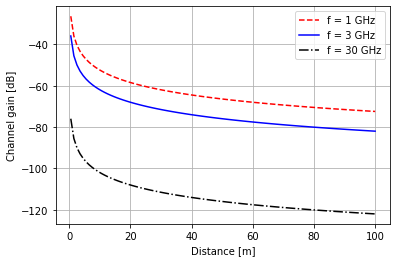

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import log10, pi

def channel_gain(d, f):
    return 10*log10((300000/f)**2/(4*pi)**2) - 20*log10(d)

distance = np.linspace(0.5, 100, 100)
frequency = [1000000, 3000000, 300000000]
channel_gains = np.zeros((len(frequency), distance.size))
frequency = [1000000, 3000000, 300000000]
for index, freq in enumerate(frequency):
    channel_gains[index, :] = [channel_gain(dist, freq) for dist in distance]

plt.plot(distance, channel_gains[0, :], 'r--',
         distance, channel_gains[1, :], 'b',
         distance, channel_gains[2, :], 'k-.')
plt.xlabel('Distance [m]')
plt.ylabel('Channel gain [dB]')
plt.legend(('f = 1 GHz', 'f = 3 GHz', 'f = 30 GHz'))
plt.grid(True)